In [1]:
# its a great honor to read Mr.Shad's article and applying his fantasic knowledges and skills in this project Thank you Sir.

# johnhhu

In [2]:
def concat_df(train_data,test_data):
    return pd.concat([train_data,test_data],sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:20631],all_data.loc[20632:]

In [3]:
###
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly as plotly
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import types
import pandas as pd
def __iter__(self): return 0

In [4]:

train_data=pd.read_table("PM_train.txt", sep=" ", header=None)
test_data=pd.read_table("PM_test.txt", sep=" ", header=None)
truth_data=pd.read_excel("Test.xlsx", index_col=0)

In [5]:
print("train_data_contains: "+str(len(train_data))+" row and "+str(len(train_data.columns))+" columns")
print("test_data_contains: "+str(len(test_data))+" row and "+str(len(test_data.columns))+" columns")
print("truth_data_contains: "+str(len(truth_data))+" row and "+str(len(truth_data.columns))+" columns")

train_data_contains: 20631 row and 28 columns
test_data_contains: 13096 row and 28 columns
truth_data_contains: 100 row and 0 columns


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
print("first_3_row_of_train_data")
display(train_data.head(3))
print("first_3_row_of_test_data")
display(test_data.head(3))
print("first_3_row_of_truth_data")
display(truth_data.head(3))


first_3_row_of_train_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN


first_3_row_of_test_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN


first_3_row_of_truth_data


""
predicted
44.447977
57.921903
60.631183


In [8]:
# Subtract previous row value from the current row value in a Pandas column

train_data[26]=train_data[0] - train_data[0].shift(1)
test_data[26]=test_data[0] - test_data[0].shift(1)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
print("failure_point_of_train_data")
display(train_data.head(194))
print("failure_point_of_test_data")
display(test_data.tail(199))

failure_point_of_train_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,0.0,NaN
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,0.0,NaN
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0.0,NaN
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,1.0,NaN


failure_point_of_test_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
12897,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,21.61,554.75,2388.01,9067.16,1.3,47.26,521.82,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,0.0,NaN
12898,100,1,0.0014,0.0003,100.0,518.67,641.65,1591.50,1401.63,14.62,21.61,554.70,2388.05,9059.87,1.3,47.28,522.06,2388.02,8138.54,8.4067,0.03,391,2388,100.0,39.01,23.3087,1.0,NaN
12899,100,2,0.0031,0.0001,100.0,518.67,642.20,1588.99,1402.05,14.62,21.61,554.05,2387.99,9057.49,1.3,47.18,522.14,2388.07,8137.35,8.4291,0.03,393,2388,100.0,38.97,23.3510,0.0,NaN
12900,100,3,-0.0000,0.0001,100.0,518.67,642.27,1587.47,1396.74,14.62,21.61,554.85,2388.11,9052.23,1.3,47.11,522.54,2388.03,8134.63,8.4039,0.03,392,2388,100.0,39.14,23.3636,0.0,NaN
12901,100,4,0.0011,0.0001,100.0,518.67,642.07,1579.17,1401.93,14.62,21.61,554.05,2388.01,9058.66,1.3,47.26,522.34,2388.00,8139.06,8.4057,0.03,393,2388,100.0,39.04,23.3925,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0.0,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0.0,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0.0,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0.0,NaN


In [11]:
train_data.rename(columns={0: 'asset_id', 1: 'run_time'}, inplace=True)
train_data.rename(columns={2: 'setting_1', 3: 'setting_2', 4: 'setting_3'}, inplace=True)
train_data.rename(columns={5: 's_1', 6: 's_2', 7: 's_3', 8: 's_4', 9: 's_5', 10: 's_6', 
                          11: 's_7', 12: 's_8', 13: 's_9', 14: 's_10', 15: 's_11', 16: 's_12', 
                          17: 's_13', 18: 's_14', 19: 's_15', 20: 's_16', 21: 's_17', 22: 's_18', 
                          23: 's_19', 24: 's_20', 25: 's_21', 26: 'failure'}, inplace=True)

test_data.rename(columns={0: 'asset_id', 1: 'run_time'}, inplace=True)
test_data.rename(columns={2: 'setting_1', 3: 'setting_2', 4: 'setting_3'}, inplace=True)
test_data.rename(columns={5: 's_1', 6: 's_2', 7: 's_3', 8: 's_4', 9: 's_5', 10: 's_6', 
                          11: 's_7', 12: 's_8', 13: 's_9', 14: 's_10', 15: 's_11', 16: 's_12', 
                          17: 's_13', 18: 's_14', 19: 's_15', 20: 's_16', 21: 's_17', 22: 's_18', 
                          23: 's_19', 24: 's_20', 25: 's_21', 26: 'failure'}, inplace=True)


In [12]:
pd.set_option('display.max_columns', None)

In [13]:
train_data.head()

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,NaN


In [14]:
test_data.head()

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0.0,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0.0,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0.0,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0.0,NaN


In [15]:
#df_all=concat_df(train_data,test_data)
#train_data,test_data=divide_df(df_all)

In [16]:
print("failure_point_of_train_data")
display(train_data.head(194))
print("failure_point_of_test_data")
display(test_data.tail(199))

#print("failure_point_of_df_all")
#display(df_all.head(196))

failure_point_of_train_data


,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,0.0,NaN
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,0.0,NaN
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0.0,NaN
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,1.0,NaN


failure_point_of_test_data


,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
12897,99,97,0.0047,-0.0000,100.0,518.67,642.00,1585.03,1397.98,14.62,21.61,554.75,2388.01,9067.16,1.3,47.26,521.82,2388.02,8150.38,8.4003,0.03,391,2388,100.0,38.95,23.3595,0.0,NaN
12898,100,1,0.0014,0.0003,100.0,518.67,641.65,1591.50,1401.63,14.62,21.61,554.70,2388.05,9059.87,1.3,47.28,522.06,2388.02,8138.54,8.4067,0.03,391,2388,100.0,39.01,23.3087,1.0,NaN
12899,100,2,0.0031,0.0001,100.0,518.67,642.20,1588.99,1402.05,14.62,21.61,554.05,2387.99,9057.49,1.3,47.18,522.14,2388.07,8137.35,8.4291,0.03,393,2388,100.0,38.97,23.3510,0.0,NaN
12900,100,3,-0.0000,0.0001,100.0,518.67,642.27,1587.47,1396.74,14.62,21.61,554.85,2388.11,9052.23,1.3,47.11,522.54,2388.03,8134.63,8.4039,0.03,392,2388,100.0,39.14,23.3636,0.0,NaN
12901,100,4,0.0011,0.0001,100.0,518.67,642.07,1579.17,1401.93,14.62,21.61,554.05,2388.01,9058.66,1.3,47.26,522.34,2388.00,8139.06,8.4057,0.03,393,2388,100.0,39.04,23.3925,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,0.0,NaN
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,0.0,NaN
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,0.0,NaN
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,0.0,NaN


In [17]:
print("missing_values_in_train_data")
display(train_data.isnull().sum())
print("missing_value_in_test_data")
display(test_data.isnull().sum())

missing_values_in_train_data


asset_id         0
run_time         0
setting_1        0
setting_2        0
setting_3        0
s_1              0
s_2              0
s_3              0
s_4              0
s_5              0
s_6              0
s_7              0
s_8              0
s_9              0
s_10             0
s_11             0
s_12             0
s_13             0
s_14             0
s_15             0
s_16             0
s_17             0
s_18             0
s_19             0
s_20             0
s_21             0
failure          1
27           20631
dtype: int64

missing_value_in_test_data


asset_id         0
run_time         0
setting_1        0
setting_2        0
setting_3        0
s_1              0
s_2              0
s_3              0
s_4              0
s_5              0
s_6              0
s_7              0
s_8              0
s_9              0
s_10             0
s_11             0
s_12             0
s_13             0
s_14             0
s_15             0
s_16             0
s_17             0
s_18             0
s_19             0
s_20             0
s_21             0
failure          1
27           13096
dtype: int64

In [18]:
train_data.describe()

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20630.000000,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,21.609803,553.367711,2388.096652,9065.242941,1.3,47.541168,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,0.004799,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,0.001389,0.885092,0.070985,22.082880,0.0,0.267087,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,0.069109,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,21.600000,549.850000,2387.900000,9021.730000,1.3,46.850000,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,21.610000,552.810000,2388.050000,9053.100000,1.3,47.350000,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,0.000000,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,21.610000,553.440000,2388.090000,9060.660000,1.3,47.510000,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,0.000000,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,21.610000,554.010000,2388.140000,9069.420000,1.3,47.700000,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,0.000000,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,21.610000,556.060000,2388.560000,9244.590000,1.3,48.530000,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,1.000000,NaN


In [19]:
test_data.describe()

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,27
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.0,13096.00,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,1.309600e+04,13096.000000,13096.0,13096.0,13096.000000,13096.000000,13095.000000,0.0
mean,51.543907,76.836515,-0.000011,0.000004,100.0,518.67,642.475088,1588.099204,1404.735362,1.462000e+01,21.609701,553.757523,2388.070964,9058.407363,1.300000e+00,47.416204,521.747724,2388.071025,8138.947817,8.425844,3.000000e-02,392.571625,2388.0,100.0,38.892502,23.335743,0.007560,NaN
std,28.289423,53.057749,0.002203,0.000294,0.0,0.00,0.400899,5.003274,6.688309,1.776425e-15,0.001704,0.681286,0.057442,11.436261,2.220531e-16,0.195917,0.559627,0.056934,10.188605,0.029009,1.040874e-17,1.233577,0.0,0.0,0.141681,0.084120,0.086623,NaN
min,1.000000,1.000000,-0.008200,-0.000600,100.0,518.67,641.130000,1569.040000,1384.390000,1.462000e+01,21.600000,550.880000,2387.890000,9024.530000,1.300000e+00,46.800000,519.380000,2387.890000,8108.500000,8.332800,3.000000e-02,389.000000,2388.0,100.0,38.310000,22.935400,0.000000,NaN
25%,28.000000,33.000000,-0.001500,-0.000200,100.0,518.67,642.197500,1584.600000,1399.950000,1.462000e+01,21.610000,553.310000,2388.030000,9051.020000,1.300000e+00,47.270000,521.380000,2388.030000,8132.310000,8.405600,3.000000e-02,392.000000,2388.0,100.0,38.800000,23.281600,0.000000,NaN
50%,52.000000,69.000000,0.000000,0.000000,100.0,518.67,642.460000,1587.990000,1404.440000,1.462000e+01,21.610000,553.800000,2388.070000,9057.320000,1.300000e+00,47.410000,521.780000,2388.070000,8138.390000,8.424900,3.000000e-02,393.000000,2388.0,100.0,38.900000,23.339200,0.000000,NaN
75%,76.000000,113.000000,0.001500,0.000300,100.0,518.67,642.740000,1591.362500,1409.050000,1.462000e+01,21.610000,554.240000,2388.110000,9064.110000,1.300000e+00,47.540000,522.150000,2388.110000,8144.360000,8.444300,3.000000e-02,393.000000,2388.0,100.0,38.990000,23.393600,0.000000,NaN
max,100.000000,303.000000,0.007800,0.000700,100.0,518.67,644.300000,1607.550000,1433.360000,1.462000e+01,21.610000,555.840000,2388.300000,9155.030000,1.300000e+00,48.260000,523.760000,2388.320000,8220.480000,8.541400,3.000000e-02,397.000000,2388.0,100.0,39.410000,23.641900,1.000000,NaN


In [20]:
failure=train_data.groupby(['failure'])['failure'].count()

failure

failure
0.0    20531
1.0       99
Name: failure, dtype: int64

In [21]:
failure_2=test_data.groupby(['failure'])['failure'].count()

failure_2

failure
0.0    12996
1.0       99
Name: failure, dtype: int64

In [22]:
#df_all=concat_df(train_data,test_data)
#train_data,test_data=divide_df(df_all)

In [23]:
#
#failure_3=df_all.groupby(['failure'])['failure'].count()
#failure_3

In [24]:
# train_data['s_2']=pd.cut(train_data['s_2'],7)
# train_data['s_2']=pd.qcut(train_data['s_2'],7,labels=["<1.684","<2.159","<2.633","<3.107","<3.581","<4.056","<4.530"])

#train_data['s_2']=pd.cut(train_data['s_2'],5,labels=["1","2","3","4","5"])

#train_data.groupby('s_2')['s_2'].count()

In [25]:
#Subtract values from maximum value within groups
train_data[27]=train_data.groupby('asset_id').run_time.transform('max') - train_data.run_time
train_data["failure"].fillna(0, inplace = True)   ###0.0
train_data.rename(columns={27: 'remain_cycle'}, inplace=True)

#Subtract values from maximum value within groups
test_data[27]=test_data.groupby('asset_id').run_time.transform('max') - test_data.run_time
test_data["failure"].fillna(0, inplace = True)   ###0.0
test_data.rename(columns={27: 'remain_cycle'}, inplace=True)

In [26]:
#df_all=concat_df(train_data,test_data)
#train_data,test_data=divide_df(df_all)

In [27]:
test_data.head(33)

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,remain_cycle
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0.0,30
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0.0,29
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0.0,28
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,0.0,27
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,0.0,26
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,21.61,554.22,2388.00,9050.96,1.3,47.26,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467,0.0,25
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,21.61,553.89,2388.05,9051.39,1.3,47.31,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952,0.0,24
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,21.61,553.59,2388.05,9052.86,1.3,47.21,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224,0.0,23
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,21.61,554.49,2388.06,9048.55,1.3,47.37,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521,0.0,22
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,21.61,554.28,2388.04,9051.95,1.3,47.14,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820,0.0,21


In [28]:
train_data.head(194)

,asset_id,run_time,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,failure,remain_cycle
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0.0,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0.0,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0.0,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0.0,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0.0,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,21.61,551.29,2388.29,9040.58,1.3,48.33,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,0.0,2
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,21.61,550.92,2388.28,9042.76,1.3,48.15,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,0.0,1
191,1,192,0.0009,-0.0000,100.0,518.67,643.54,1601.41,1427.20,14.62,21.61,551.25,2388.32,9033.22,1.3,48.25,520.08,2388.32,8110.93,8.5113,0.03,396,2388,100.0,38.48,22.9649,0.0,0
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,21.60,554.53,2388.01,9054.72,1.3,46.93,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585,1.0,286


In [29]:
# replaced with df_all, check it below
train_data['coming'] = np.where(((train_data.remain_cycle < 21) & ((train_data.remain_cycle>=0))), 1, 0)

tips_summed = train_data.groupby(['coming'])['s_4'].count()
tips_summed

coming
0    18531
1     2100
Name: s_4, dtype: int64

In [30]:
# replaced with df_all, check it below
test_data['coming'] = np.where(((test_data.remain_cycle <= 21) & ((test_data.remain_cycle>=0))), 1, 0)

tips_summed = test_data.groupby(['coming'])['s_4'].count()
tips_summed

coming
0    10896
1     2200
Name: s_4, dtype: int64

In [31]:
train_data['coming'].mean()

#df_all['coming'].mean()

0.10178857059764432

In [32]:
#
test_data['coming'].mean()

0.1679902260232132

In [33]:
#df_all['coming'].mean()

df_all=concat_df(train_data,test_data)
#train_data,test_data=divide_df(df_all)

In [34]:
df_all.head()

,asset_id,coming,failure,remain_cycle,run_time,s_1,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_2,s_20,s_21,s_3,s_4,s_5,s_6,s_7,s_8,s_9,setting_1,setting_2,setting_3
0,1,0,0.0,191,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,641.82,39.06,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004,100.0
1,1,0,0.0,190,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,642.15,39.00,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003,100.0
2,1,0,0.0,189,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,642.35,38.95,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003,100.0
3,1,0,0.0,188,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,642.35,38.88,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000,100.0
4,1,0,0.0,187,5,518.67,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,642.37,38.90,23.4044,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,-0.0019,-0.0002,100.0


In [35]:
# train_data replaced to df_all


import numpy as np
# Create a running mean, max, min, and median for the sensor variables

dfx=df_all

dfx['setting_1_mean'] = np.where((df_all.coming == 0),(df_all['setting_1'].rolling(min_periods=1, window=21).mean()) , df_all.setting_1)
dfx['setting_2_mean'] = np.where((df_all.coming == 0),(df_all['setting_2'].rolling(min_periods=1, window=21).mean()) , df_all.setting_2)


dfx['s_2_mean'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).mean()) , df_all.s_2)
dfx['s_2_median'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).median()) , df_all.s_2)
dfx['s_2_max'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).max()) , df_all.s_2)
dfx['s_2_min'] = np.where((df_all.coming == 0),(df_all['s_2'].rolling(min_periods=1, window=21).min()) , df_all.s_2)

dfx['s_3_mean'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).mean()) , df_all.s_3)
dfx['s_3_median'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).median()) , df_all.s_3)
dfx['s_3_max'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).max()) , df_all.s_3)
dfx['s_3_min'] = np.where((df_all.coming == 0),(df_all['s_3'].rolling(min_periods=1, window=21).min()) , df_all.s_3)

dfx['s_4_mean'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).mean()) , df_all.s_4)
dfx['s_4_median'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).median()) , df_all.s_4)
dfx['s_4_max'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).max()) , df_all.s_4)
dfx['s_4_min'] = np.where((df_all.coming == 0),(df_all['s_4'].rolling(min_periods=1, window=21).min()) , df_all.s_4)

dfx['s_7_mean'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).mean()) , df_all.s_7)
dfx['s_7_median'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).median()) , df_all.s_7)
dfx['s_7_max'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).max()) , df_all.s_7)
dfx['s_7_min'] = np.where((df_all.coming == 0),(df_all['s_7'].rolling(min_periods=1, window=21).min()) , df_all.s_7)

dfx['s_8_mean'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).mean()) , df_all.s_8)
dfx['s_8_median'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).median()) , df_all.s_8)
dfx['s_8_max'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).max()) , df_all.s_8)
dfx['s_8_min'] = np.where((df_all.coming == 0),(df_all['s_8'].rolling(min_periods=1, window=21).min()) , df_all.s_8)

dfx['s_9_mean'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).mean()) , df_all.s_9)
dfx['s_9_median'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).median()) , df_all.s_9)
dfx['s_9_max'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).max()) , df_all.s_9)
dfx['s_9_min'] = np.where((df_all.coming == 0),(df_all['s_9'].rolling(min_periods=1, window=21).min()) , df_all.s_9)

dfx['s_11_mean'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).mean()) , df_all.s_11)
dfx['s_11_median'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).median()) , df_all.s_11)
dfx['s_11_max'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).max()) , df_all.s_11)
dfx['s_11_min'] = np.where((df_all.coming == 0),(df_all['s_11'].rolling(min_periods=1, window=21).min()) , df_all.s_11)

dfx['s_12_mean'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).mean()) , df_all.s_12)
dfx['s_12_median'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).median()) , df_all.s_12)
dfx['s_12_max'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).max()) , df_all.s_12)
dfx['s_12_min'] = np.where((df_all.coming == 0),(df_all['s_12'].rolling(min_periods=1, window=21).min()) , df_all.s_12)

dfx['s_13_mean'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).mean()) , df_all.s_13)
dfx['s_13_median'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).median()) , df_all.s_13)
dfx['s_13_max'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).max()) , df_all.s_13)
dfx['s_13_min'] = np.where((df_all.coming == 0),(df_all['s_13'].rolling(min_periods=1, window=21).min()) , df_all.s_13)

dfx['s_14_mean'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).mean()) , df_all.s_14)
dfx['s_14_median'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).median()) , df_all.s_14)
dfx['s_14_max'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).max()) , df_all.s_14)
dfx['s_14_min'] = np.where((df_all.coming == 0),(df_all['s_14'].rolling(min_periods=1, window=21).min()) , df_all.s_14)

dfx['s_15_mean'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).mean()) , df_all.s_15)
dfx['s_15_median'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).median()) , df_all.s_15)
dfx['s_15_max'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).max()) , df_all.s_15)
dfx['s_15_min'] = np.where((df_all.coming == 0),(df_all['s_15'].rolling(min_periods=1, window=21).min()) , df_all.s_15)

dfx['s_17_mean'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).mean()) , df_all.s_17)
dfx['s_17_median'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).median()) , df_all.s_17)
dfx['s_17_max'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).max()) , df_all.s_17)
dfx['s_17_min'] = np.where((df_all.coming == 0),(df_all['s_17'].rolling(min_periods=1, window=21).min()) , df_all.s_17)

dfx['s_20_mean'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).mean()) , df_all.s_20)
dfx['s_20_median'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).median()) , df_all.s_20)
dfx['s_20_max'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).max()) , df_all.s_20)
dfx['s_20_min'] = np.where((df_all.coming == 0),(df_all['s_20'].rolling(min_periods=1, window=21).min()) , df_all.s_20)

dfx['s_21_mean'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).mean()) , df_all.s_21)
dfx['s_21_median'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).median()) , df_all.s_21)
dfx['s_21_max'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).max()) , df_all.s_21)
dfx['s_21_min'] = np.where((df_all.coming == 0),(df_all['s_21'].rolling(min_periods=1, window=21).min()) , df_all.s_21)


In [36]:
## train_data replaced to df_all

# Another useful transformation is to look for sudden spikes in sensor values
# This code creates a value indicating how far the current value is from the immediate norm


dfx['setting_1_chg'] = np.where((df_all.setting_1_mean == 0),0 , df_all.setting_1/df_all.setting_1_mean)
dfx['setting_2_chg'] = np.where((df_all.setting_2_mean == 0),0 , df_all.setting_2/df_all.setting_2_mean)


dfx['s_2_chg'] = np.where((df_all.s_2_mean == 0),0 , df_all.s_2/df_all.s_2_mean)
dfx['s_3_chg'] = np.where((df_all.s_3_mean == 0),0 , df_all.s_3/df_all.s_3_mean)
dfx['s_4_chg'] = np.where((df_all.s_4_mean == 0),0 , df_all.s_4/df_all.s_4_mean)

dfx['s_7_chg'] = np.where((df_all.s_7_mean == 0),0 , df_all.s_7/df_all.s_7_mean)
dfx['s_8_chg'] = np.where((df_all.s_8_mean == 0),0 , df_all.s_8/df_all.s_8_mean)
dfx['s_9_chg'] = np.where((df_all.s_9_mean == 0),0 , df_all.s_9/df_all.s_9_mean)

dfx['s_11_chg'] = np.where((df_all.s_11_mean == 0),0 , df_all.s_11/df_all.s_11_mean)
dfx['s_12_chg'] = np.where((df_all.s_12_mean == 0),0 , df_all.s_12/df_all.s_12_mean)
dfx['s_13_chg'] = np.where((df_all.s_13_mean == 0),0 , df_all.s_13/df_all.s_13_mean)

dfx['s_14_chg'] = np.where((df_all.s_14_mean == 0),0 , df_all.s_14/df_all.s_14_mean)
dfx['s_15_chg'] = np.where((df_all.s_15_mean == 0),0 , df_all.s_15/df_all.s_15_mean)
dfx['s_17_chg'] = np.where((df_all.s_17_mean == 0),0 , df_all.s_17/df_all.s_17_mean)

dfx['s_20_chg'] = np.where((df_all.s_20_mean == 0),0 , df_all.s_20/df_all.s_20_mean)
dfx['s_21_chg'] = np.where((df_all.s_21_mean == 0),0 , df_all.s_21/df_all.s_21_mean)


#copy the data set to the original name
df_all=dfx

In [37]:
df_all['setting_1_mean'].dtypes

dtype('float64')

In [38]:
df_all['setting_2_mean'].dtypes

dtype('float64')

In [39]:
df_all['s_18'] = df_all.s_18.astype(float)

In [40]:
df_all['s_17'] = df_all.s_17.astype(float)

In [41]:
#df_all=concat_df(train_data,test_data)
train_data,test_data=divide_df(df_all)

In [42]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 103 columns):
 #    Column          Dtype  
---   ------          -----  
 0    asset_id        int64  
 1    coming          int64  
 2    failure         float64
 3    remain_cycle    int64  
 4    run_time        int64  
 5    s_1             float64
 6    s_10            float64
 7    s_11            float64
 8    s_12            float64
 9    s_13            float64
 10   s_14            float64
 11   s_15            float64
 12   s_16            float64
 13   s_17            float64
 14   s_18            float64
 15   s_19            float64
 16   s_2             float64
 17   s_20            float64
 18   s_21            float64
 19   s_3             float64
 20   s_4             float64
 21   s_5             float64
 22   s_6             float64
 23   s_7             float64
 24   s_8             float64
 25   s_9             float64
 26   setting_1       float64
 27   setting_2     

In [43]:
test_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13095 entries, 20632 to 33726
Data columns (total 103 columns):
 #    Column          Dtype  
---   ------          -----  
 0    asset_id        int64  
 1    coming          int64  
 2    failure         float64
 3    remain_cycle    int64  
 4    run_time        int64  
 5    s_1             float64
 6    s_10            float64
 7    s_11            float64
 8    s_12            float64
 9    s_13            float64
 10   s_14            float64
 11   s_15            float64
 12   s_16            float64
 13   s_17            float64
 14   s_18            float64
 15   s_19            float64
 16   s_2             float64
 17   s_20            float64
 18   s_21            float64
 19   s_3             float64
 20   s_4             float64
 21   s_5             float64
 22   s_6             float64
 23   s_7             float64
 24   s_8             float64
 25   s_9             float64
 26   setting_1       float64
 27   setting_2 

In [44]:
train_data.head(6)

,asset_id,coming,failure,remain_cycle,run_time,s_1,s_10,s_11,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_2,s_20,s_21,s_3,s_4,s_5,s_6,s_7,s_8,s_9,setting_1,setting_2,setting_3,setting_1_mean,setting_2_mean,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,1,0,0.0,191,1,518.67,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392.0,2388.0,100.0,641.82,39.06,23.4190,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,-0.0007,-0.0004,100.0,-0.000700,-0.000400,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.060000,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470,47.470,47.47,47.47,521.660000,521.660,521.66,521.66,2388.020,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0,0.0,190,2,518.67,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392.0,2388.0,100.0,642.15,39.00,23.4236,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,0.0019,-0.0003,100.0,0.000600,-0.000350,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.050000,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480,47.480,47.49,47.47,521.970000,521.970,522.28,521.66,2388.045,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,3.166667,0.857143,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,1,0,0.0,189,3,518.67,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390.0,2388.0,100.0,642.35,38.95,23.3442,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,-0.0043,0.0003,100.0,-0.001033,-0.000133,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.060000,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410,47.470,47.49,47.27,522.120000,522.280,522.42,521.66,2388.040,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,4.161290,-2.250000,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,1,0,0.0,188,4,518.67,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392.0,2388.0,100.0,642.35,38.88,23.3739,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,0.0007,0.0000,100.0,-0.000600,-0.000100,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.072500,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340,47.370,47.49,47.13,522.305000,522.350,522.86,521.66,2388.050,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,-1.166667,-0.

In [45]:
training_features=train_data[['setting_1','setting_2','s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21',
                               
                               's_2_mean','s_2_median','s_2_max','s_2_min',  's_3_mean','s_3_median','s_3_max','s_3_min',
                               's_4_mean','s_4_median','s_4_max','s_4_min',  's_7_mean','s_7_median','s_7_max','s_7_min',
                               's_8_mean','s_8_median','s_8_max','s_8_min',  's_9_mean','s_9_median','s_9_max','s_9_min',
                               's_11_mean','s_11_median','s_11_max','s_11_min',  's_12_mean','s_12_median','s_12_max','s_12_min',
                               's_13_mean','s_13_median','s_13_max','s_13_min',  's_14_mean','s_14_median','s_14_max','s_14_min',
                               's_15_mean','s_15_median','s_15_max','s_15_min',  's_17_mean','s_17_median','s_17_max','s_17_min',
                               's_20_mean','s_20_median','s_20_max','s_20_min',  's_21_mean','s_21_median','s_21_max','s_21_min',
                               
                               'setting_1_chg','setting_2_chg','s_2_chg','s_3_chg','s_4_chg','s_7_chg','s_8_chg','s_9_chg','s_11_chg','s_12_chg',
                               's_13_chg','s_14_chg','s_15_chg','s_17_chg','s_20_chg','s_21_chg',]]


target_feature=train_data[['coming']]

In [46]:
training_features.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   setting_1      20632 non-null  float64
 1   setting_2      20632 non-null  float64
 2   s_2            20632 non-null  float64
 3   s_3            20632 non-null  float64
 4   s_4            20632 non-null  float64
 5   s_7            20632 non-null  float64
 6   s_8            20632 non-null  float64
 7   s_9            20632 non-null  float64
 8   s_11           20632 non-null  float64
 9   s_12           20632 non-null  float64
 10  s_13           20632 non-null  float64
 11  s_14           20632 non-null  float64
 12  s_15           20632 non-null  float64
 13  s_17           20632 non-null  float64
 14  s_20           20632 non-null  float64
 15  s_21           20632 non-null  float64
 16  s_2_mean       20632 non-null  float64
 17  s_2_median     20632 non-null  float64
 18  s_2_ma

In [47]:
X=training_features

In [48]:
target_feature.dtypes

coming    int64
dtype: object

In [49]:
y=target_feature#.astype(int)

#y=target_feature.astype(int)

In [50]:
##
#train_data=train_data.drop(columns=['index'])

#train_data=train_data.sort_values(by=['asset_id', 'run_time'], ascending=[True, True])
#train_data.reset_index(inplace=True)

In [51]:
#df_train_test=train_data[train_data['MODELING_GROUP'] != 'VALIDATION']
df_train_test=test_data.drop(columns=['run_time','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19','failure','remain_cycle',    'setting_1_mean','setting_2_mean'])
             #test                                                                                                   #TIME_TO_FAILURE
df_train_test.shape

(13095, 90)

In [52]:
df_train_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13095 entries, 20632 to 33726
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   asset_id       13095 non-null  int64  
 1   coming         13095 non-null  int64  
 2   s_11           13095 non-null  float64
 3   s_12           13095 non-null  float64
 4   s_13           13095 non-null  float64
 5   s_14           13095 non-null  float64
 6   s_15           13095 non-null  float64
 7   s_17           13095 non-null  float64
 8   s_2            13095 non-null  float64
 9   s_20           13095 non-null  float64
 10  s_21           13095 non-null  float64
 11  s_3            13095 non-null  float64
 12  s_4            13095 non-null  float64
 13  s_7            13095 non-null  float64
 14  s_8            13095 non-null  float64
 15  s_9            13095 non-null  float64
 16  setting_1      13095 non-null  float64
 17  setting_2      13095 non-null  float64
 18  s_

In [53]:
pd.set_option('display.max_columns', None)

df_train_test.head()

,asset_id,coming,s_11,s_12,s_13,s_14,s_15,s_17,s_2,s_20,s_21,s_3,s_4,s_7,s_8,s_9,setting_1,setting_2,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
20632,1,0,47.50,522.16,2388.06,8139.62,8.3803,393.0,641.71,39.02,23.3916,1588.45,1395.42,554.85,2388.01,9054.42,-0.0027,-0.0003,643.364762,643.49,643.95,641.71,1598.797143,1599.81,1610.87,1585.29,1423.161905,1426.53,1433.58,1395.42,551.714762,551.53,554.85,550.68,2388.204762,2388.22,2388.29,2388.01,9065.241905,9065.94,9073.72,9050.17,48.005714,48.06,48.39,47.2,520.145238,520.01,522.16,519.3,2388.215714,2388.22,2388.28,2388.03,8139.942857,8140.49,8144.21,8125.55,8.497548,8.5006,8.5646,8.3803,395.476190,395.0,398.0,392.0,38.488571,38.44,39.02,38.14,23.121529,23.1173,23.3916,22.9333,16.200000,63.0,0.997428,0.993528,0.980507,1.005683,0.999918,0.998806,0.989466,1.003873,0.999935,0.999960,0.986202,0.993739,1.013807,1.011681
20633,1,0,47.50,521.97,2388.03,8130.10,8.4441,393.0,642.46,39.08,23.4166,1586.94,1401.34,554.11,2388.05,9056.96,0.0003,0.0001,643.314286,643.42,643.95,641.71,1597.970000,1598.88,1610.87,1585.29,1422.381429,1426.53,1433.58,1395.42,551.840476,551.61,554.85,550.68,2388.198095,2388.22,2388.29,2388.01,9064.924762,9065.94,9073.72,9050.17,47.993810,48.06,48.39,47.2,520.236667,520.01,522.16,519.3,2388.206667,2388.22,2388.28,2388.03,8139.430000,8139.94,8144.21,8125.55,8.495576,8.5006,8.5646,8.3803,395.333333,395.0,398.0,392.0,38.520476,38.47,39.08,38.14,23.135229,23.1173,23.4166,22.9333,-1.615385,21.0,0.998672,0.993097,0.985207,1.004113,0.999938,0.999121,0.989711,1.003332,0.999926,0.998854,0.993941,0.994098,1.014525,1.012162
20634,1,0,47.28,521.38,2388.05,8132.90,8.3917,391.0,642.44,39.00,23.3737,1584.12,1406.42,554.07,2388.03,9045.29,0.0042,0.0000,643.271429,643.42,643.95,641.71,1597.470952,1598.88,1610.87,1584.12,1421.388571,1426.04,1433.58,1395.42,551.947143,551.61,554.85,550.68,2388.190000,2388.22,2388.29,2388.01,9063.934762,9065.90,9073.72,9045.29,47.959524,48.06,48.39,47.2,520.271905,520.01,522.16,519.3,2388.198095,2388.22,2388.28,2388.03,8138.891429,8139.78,8143.56,8125.55,8.490390,8.4989,8.5646,8.3803,395.142857,395.0,398.0,391.0,38.544762,38.47,39.08,38.14,23.149648,23.1218,23.4166,22.9333,63.000000,0.0,0.998707,0.991642,0.989469,1.003846,0.999933,0.997943,0.985831,1.002130,0.999938,0.999264,0.988376,0.989516,1.011811,1.009678
20635,1,0,47.31,522.15,2388.03,8129.54,8.4031,390.0,642.51,38.99,23.4130,1587.19,1401.92,554.16,2388.01,9044.55,0.0014,0.0000,643.252381,643.42,643.95,641.71,1596.914286,1597.98,1610.87,1584.12,1420.485238,1426.04,1433.58,1395.42,552.063333,551.61,554.85,550.68,2388.178571,2388.21,2388.29,2388.01,9063.001905,9065.90,9073.72,9044.55,47.927619,48.06,48.39,47.2,520.371905,520.01,522.16,519.3,2388.190000,2388.22,2388.28,2388.03,8138.284762,8139.67,8143.56,8125.55,8.485829,8.4956,8.5646,8.3803,394.857143,395.0,398.0,390.0,38.570952,38.49,39.08,38.14,23.163462,23.1218,23.4166,22.9333,294.000000,0.0,0.998846,0.993911,0.986930,1.003798,0.999929,0.997964,0.987114,1.003417,0.999933,0.998925,0.990251,0.987699,1.010864,1.010773
20636,1,0,47.26,521.92,2388.08,8127.46,8.4238,392.0,642.11,38.91,23.3467,1579.12,1395.13,554.22,2388.00,9050.96,0.0012,0.0003,643.164762,643.41,643.85,641.71,1595.881429,1597.77,1610.87,1579.12,1419.284762,1426.04,1433.58,1395.13,552.172857,551.61,554.85,550.68,2388.169524,2388.21,2388.29,2388.00,9062.097619,

In [54]:
#



#df_all=df_all.drop(columns=['remain_cycle','run_time','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19','failure'])
#df_total                   #remain_cycle

In [55]:
#df_train_test['asset_id']=df_train_test.asset_id.astype(float)
#df_train_test['s_17']=df_train_test.s_17.astype(float)

In [56]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   setting_1      20632 non-null  float64
 1   setting_2      20632 non-null  float64
 2   s_2            20632 non-null  float64
 3   s_3            20632 non-null  float64
 4   s_4            20632 non-null  float64
 5   s_7            20632 non-null  float64
 6   s_8            20632 non-null  float64
 7   s_9            20632 non-null  float64
 8   s_11           20632 non-null  float64
 9   s_12           20632 non-null  float64
 10  s_13           20632 non-null  float64
 11  s_14           20632 non-null  float64
 12  s_15           20632 non-null  float64
 13  s_17           20632 non-null  float64
 14  s_20           20632 non-null  float64
 15  s_21           20632 non-null  float64
 16  s_2_mean       20632 non-null  float64
 17  s_2_median     20632 non-null  float64
 18  s_2_ma

In [57]:
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import SMOTENC
 
sm = SMOTE()
#sm = SMOTE(random_state=12)#12
#smx = SMOTENC(random_state=12,  categorical_features=[0, 1, 2, 3])

X_res, y_res = sm.fit_resample(X,y) #.values.ravel()

In [58]:
X_res.head()

,setting_1,setting_2,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.6,554.360000,554.360,554.36,554.36,2388.0600,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470,47.47,47.47,47.47,521.660,521.66,521.66,521.66,2388.020,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.6,554.055000,554.055,554.36,553.75,2388.0500,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480,47.48,47.49,47.47,521.970,521.97,522.28,521.66,2388.045,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,3.166667,0.857143,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.6,554.123333,554.260,554.36,553.75,2388.0600,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410,47.47,47.49,47.27,522.120,522.28,522.42,521.66,2388.040,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,4.161290,-2.250000,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.6,554.205000,554.310,554.45,553.75,2388.0725,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340,47.37,47.49,47.13,522.305,522.35,522.86,521.66,2388.050,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,-1.166667,-0.000000,1.000284,0.996672,0.999585,1.000442,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,642.208000,642.350,642.37,641.82,1587.030000,1587.990,1591.82,1582.79,1403.206000,1403.140,1406.22,1400.6,554.164000,554.260,554.45,553.75,2388.0700,2388.06,2388.11,2388.04,9049.566000,9049.480,9055.15,9044.07,47.328,47.

In [59]:
y_res.head()

,coming
0,0
1,0
2,0
3,0
4,0


In [60]:
#############################


#
#df_X=pd.DataFrame(X_res)
#
#df_X.columns = ['setting_1','setting_2','s_2','s_3','s_4','s_7','s_8','s_9','s_11','s_12','s_13','s_14','s_15','s_17','s_20','s_21',
                               
                              #'s_2_mean','s_2_median','s_2_max', 's_2_min',  's_3_mean','s_3_median','s_3_max','s_3_min',
                              #'s_4_mean','s_4_median','s_4_max', 's_4_min',  's_7_mean','s_7_median','s_7_max','s_7_min',
                              #'s_8_mean','s_8_median','s_8_max', 's_8_min',  's_9_mean','s_9_median','s_9_max','s_9_min',
                              #'s_11_mean','s_11_median','s_11_max', 's_11_min',  's_12_mean','s_12_median','s_12_max','s_12_min',
                              #'s_13_mean','s_13_median','s_13_max', 's_13_min',  's_14_mean','s_14_median','s_14_max','s_14_min',
                              #'s_15_mean','s_15_median','s_15_max', 's_15_min',  's_17_mean','s_17_median','s_17_max','s_17_min',
                              #'s_20_mean','s_20_median','s_20_max', 's_20_min',  's_21_mean','s_21_median','s_21_max','s_21_min',
                              #
                              #'setting_1_chg','setting_2_chg','s_2_chg','s_3_chg','s_4_chg','s_7_chg','s_8_chg','s_9_chg','s_11_chg','s_12_chg',
                              #'s_13_chg','s_14_chg','s_15_chg','s_17_chg','s_20_chg','s_21_chg']

In [61]:
#############################




# format dependent variable

#df_y=pd.DataFrame(y_res)
#df_y.columns=['coming']

In [62]:
############################



#
#df_y.mean(axis=0)

In [63]:
# merge the dependent and independent variables post SMOTE into dataframe

#
#df_balanced=pd.concat([df_y,df_X],axis=1)


df_balanced=pd.concat([X_res,y_res],axis=1)

In [64]:
df_balanced.head(194)

,setting_1,setting_2,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg,coming
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.060000,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470000,47.47,47.47,47.47,521.660000,521.66,521.66,521.66,2388.020000,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.050000,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480000,47.48,47.49,47.47,521.970000,521.97,522.28,521.66,2388.045000,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,3.166667,0.857143,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098,0
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.060000,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410000,47.47,47.49,47.27,522.120000,522.28,522.42,521.66,2388.040000,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,4.161290,-2.250000,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803,0
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.072500,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340000,47.37,47.49,47.13,522.305000,522.35,522.86,521.66,2388.050000,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,-1.166667,-0.000000,1.000284,0.996672,0.999585,1.000442,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304,0
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,642.208000,642.350,642.37,641.82,1587.030000,1587.990,1591.82,1582.79,1403.206000,1403.140,1406.22,1400.60,554.164000,554.260,554.45,553.75,2388.070000,2388.

In [65]:
##

#df_balanced=df_balanced.drop(columns=['run_time','setting_3','s_1','s_5','s_6','s_10','s_16','s_18','s_19'])

In [66]:
features = [X for X in df_balanced.columns if X not in ['coming','failure']]
dependent=pd.DataFrame(df_balanced['coming'])

independent=df_balanced.drop(columns=['coming'])

#make sure everything is numeric for simplicity


independent = independent.apply(pd.to_numeric) 
df_balanced = df_balanced.apply(pd.to_numeric)

In [67]:
independent.head(194)

,setting_1,setting_2,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.060000,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470000,47.47,47.47,47.47,521.660000,521.66,521.66,521.66,2388.020000,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.050000,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480000,47.48,47.49,47.47,521.970000,521.97,522.28,521.66,2388.045000,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,3.166667,0.857143,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.060000,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410000,47.47,47.49,47.27,522.120000,522.28,522.42,521.66,2388.040000,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,4.161290,-2.250000,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.072500,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340000,47.37,47.49,47.13,522.305000,522.35,522.86,521.66,2388.050000,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,-1.166667,-0.000000,1.000284,0.996672,0.999585,1.000442,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,642.208000,642.350,642.37,641.82,1587.030000,1587.990,1591.82,1582.79,1403.206000,1403.140,1406.22,1400.60,554.164000,554.260,554.45,553.75,2388.070000,2388.06,2388.11,2388

In [68]:
dependent.head(194)

,coming
0,0
1,0
2,0
3,0
4,0
...,...
189,1
190,1
191,1
192,0


In [69]:
dependent.head()

,coming
0,0
1,0
2,0
3,0
4,0


In [70]:
training_features.head(194)

,setting_1,setting_2,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,s_2_mean,s_2_median,s_2_max,s_2_min,s_3_mean,s_3_median,s_3_max,s_3_min,s_4_mean,s_4_median,s_4_max,s_4_min,s_7_mean,s_7_median,s_7_max,s_7_min,s_8_mean,s_8_median,s_8_max,s_8_min,s_9_mean,s_9_median,s_9_max,s_9_min,s_11_mean,s_11_median,s_11_max,s_11_min,s_12_mean,s_12_median,s_12_max,s_12_min,s_13_mean,s_13_median,s_13_max,s_13_min,s_14_mean,s_14_median,s_14_max,s_14_min,s_15_mean,s_15_median,s_15_max,s_15_min,s_17_mean,s_17_median,s_17_max,s_17_min,s_20_mean,s_20_median,s_20_max,s_20_min,s_21_mean,s_21_median,s_21_max,s_21_min,setting_1_chg,setting_2_chg,s_2_chg,s_3_chg,s_4_chg,s_7_chg,s_8_chg,s_9_chg,s_11_chg,s_12_chg,s_13_chg,s_14_chg,s_15_chg,s_17_chg,s_20_chg,s_21_chg
0,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392.0,39.06,23.4190,641.820000,641.820,641.82,641.82,1589.700000,1589.700,1589.70,1589.70,1400.600000,1400.600,1400.60,1400.60,554.360000,554.360,554.36,554.36,2388.060000,2388.06,2388.06,2388.06,9046.190000,9046.190,9046.19,9046.19,47.470000,47.47,47.47,47.47,521.660000,521.66,521.66,521.66,2388.020000,2388.020,2388.02,2388.02,8138.620000,8138.620,8138.62,8138.62,8.419500,8.41950,8.4195,8.4195,392.000000,392.0,392.0,392.0,39.060000,39.060,39.06,39.06,23.419000,23.41900,23.4190,23.4190,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392.0,39.00,23.4236,641.985000,641.985,642.15,641.82,1590.760000,1590.760,1591.82,1589.70,1401.870000,1401.870,1403.14,1400.60,554.055000,554.055,554.36,553.75,2388.050000,2388.05,2388.06,2388.04,9045.130000,9045.130,9046.19,9044.07,47.480000,47.48,47.49,47.47,521.970000,521.97,522.28,521.66,2388.045000,2388.045,2388.07,2388.02,8135.055000,8135.055,8138.62,8131.49,8.425650,8.42565,8.4318,8.4195,392.000000,392.0,392.0,392.0,39.030000,39.030,39.06,39.00,23.421300,23.42130,23.4236,23.4190,3.166667,0.857143,1.000257,1.000666,1.000906,0.999450,0.999996,0.999883,1.000211,1.000594,1.000010,0.999562,1.000730,1.000000,0.999231,1.000098
2,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390.0,38.95,23.3442,642.106667,642.150,642.35,641.82,1589.836667,1589.700,1591.82,1587.99,1402.646667,1403.140,1404.20,1400.60,554.123333,554.260,554.36,553.75,2388.060000,2388.06,2388.08,2388.04,9047.733333,9046.190,9052.94,9044.07,47.410000,47.47,47.49,47.27,522.120000,522.28,522.42,521.66,2388.040000,2388.030,2388.07,2388.02,8134.446667,8133.230,8138.62,8131.49,8.423033,8.41950,8.4318,8.4178,391.333333,392.0,392.0,390.0,39.003333,39.000,39.06,38.95,23.395600,23.41900,23.4236,23.3442,4.161290,-2.250000,1.000379,0.998838,1.001107,1.000247,1.000008,1.000575,0.997047,1.000575,0.999996,0.999850,0.999379,0.996593,0.998633,0.997803
3,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392.0,38.88,23.3739,642.167500,642.250,642.35,641.82,1588.075000,1588.845,1591.82,1582.79,1402.452500,1402.505,1404.20,1400.60,554.205000,554.310,554.45,553.75,2388.072500,2388.07,2388.11,2388.04,9048.170000,9047.835,9052.94,9044.07,47.340000,47.37,47.49,47.13,522.305000,522.35,522.86,521.66,2388.050000,2388.050,2388.08,2388.02,8134.292500,8133.530,8138.62,8131.49,8.409325,8.41865,8.4318,8.3682,391.500000,392.0,392.0,390.0,38.972500,38.975,39.06,38.88,23.390175,23.39645,23.4236,23.3442,-1.166667,-0.000000,1.000284,0.996672,0.999585,1.000442,1.000016,1.000145,0.995564,1.001063,1.000013,0.999943,0.995110,1.001277,0.997627,0.999304
4,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393.0,38.90,23.4044,642.208000,642.350,642.37,641.82,1587.030000,1587.990,1591.82,1582.79,1403.206000,1403.140,1406.22,1400.60,554.164000,554.260,554.45,553.75,2388.070000,2388.06,2388.11,2388

In [71]:
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors,  cv_folds=5,   early_stopping_rounds=1):
       
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['coming'], eval_metric='auc')
    
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False) 
    feat_imp.plot(kind='bar', title='Feature Importance', color='g') 
    plt.ylabel('Feature Importance Score')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['coming'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['coming'], dtrain_predprob))

#from sklearn import cross_validation
import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors, cv_folds=5, early_stopping_rounds=1):
    
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(train[predictors].values, target['coming'].values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
    alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['coming'], eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['coming'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(target['coming'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importance', color='g')
    plt.ylabel('Feature Importance Score')


In [72]:
#
#xgb0 = XGBClassifier(objective= 'binary:logistic')


# initializing our first model with an objective and learning rate
xgb0 = XGBClassifier(
 objective= 'binary:logistic',
 learning_rate = 0.1, 
 n_estimators = 30)

/home/marry/.local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy : 1
AUC Score (Balanced): 1.000000


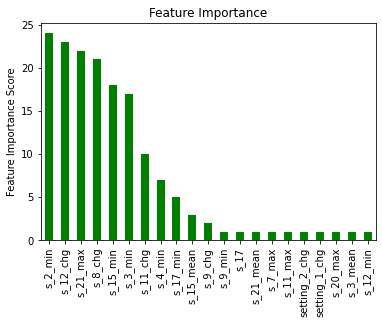

In [73]:
evaluate_model(xgb0, independent, dependent, features)

In [74]:
df_testing=df_train_test.copy() 
df_training=df_train_test.copy()

In [75]:
df_training['P_FAIL'] = xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .50)), 0, 1)

#Print model report:
print("Accuracy: %.4g" % metrics.accuracy_score(df_training['coming'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['coming'], df_training['P_FAIL']))

Accuracy: 0.9093
AUC Score (Train): 0.864981


In [76]:
df_training['P_FAIL'] = xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .67)), 0, 1)

#Print model report:
print("Accuracy: %.4g" % metrics.accuracy_score(df_training['coming'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['coming'], df_training['P_FAIL']))

Accuracy: 0.9041
AUC Score (Train): 0.864981


In [77]:
df_testing['P_FAIL'] = xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .78)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['coming'].values, df_testing['Y_FAIL']))
print("AUC Score (Test): %f" % metrics.roc_auc_score(df_testing['coming'], df_testing['P_FAIL']))

Accuracy : 0.8956
AUC Score (Test): 0.864981


In [78]:
# applying the model into the test_data


In [79]:
df_testing['P_FAIL'] = xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .025)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['coming'].values, df_testing['Y_FAIL']))
print("AUC Score (Test): %f" % metrics.roc_auc_score(df_testing['coming'], df_testing['P_FAIL']))

Accuracy : 0.9546
AUC Score (Test): 0.864981


In [80]:
##

df_testing['P_FAIL']

20632    0.024097
20633    0.024097
20634    0.024097
20635    0.024097
20636    0.024097
           ...   
33722    0.975895
33723    0.969617
33724    0.975895
33725    0.972474
33726    0.975895
Name: P_FAIL, Length: 13095, dtype: float32

In [81]:

df_testing['Y_FAIL']

20632    0
20633    0
20634    0
20635    0
20636    0
        ..
33722    1
33723    1
33724    1
33725    1
33726    1
Name: Y_FAIL, Length: 13095, dtype: int64

In [82]:
####
output=pd.DataFrame({'asset_id':df_testing.asset_id,'coming':df_testing['Y_FAIL']})

#output['coming']=output['coming']#.astype(int)
output.to_csv('PaperCO.csv',index=False)